<ipython-input-3-5a9dcedfee98>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
<ipython-input-3-5a9dcedfee98>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SHIPDATE'] = pd.to_datetime(df['SHIPDATE'])
<ipython-input-3-5a9dcedfee98>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')


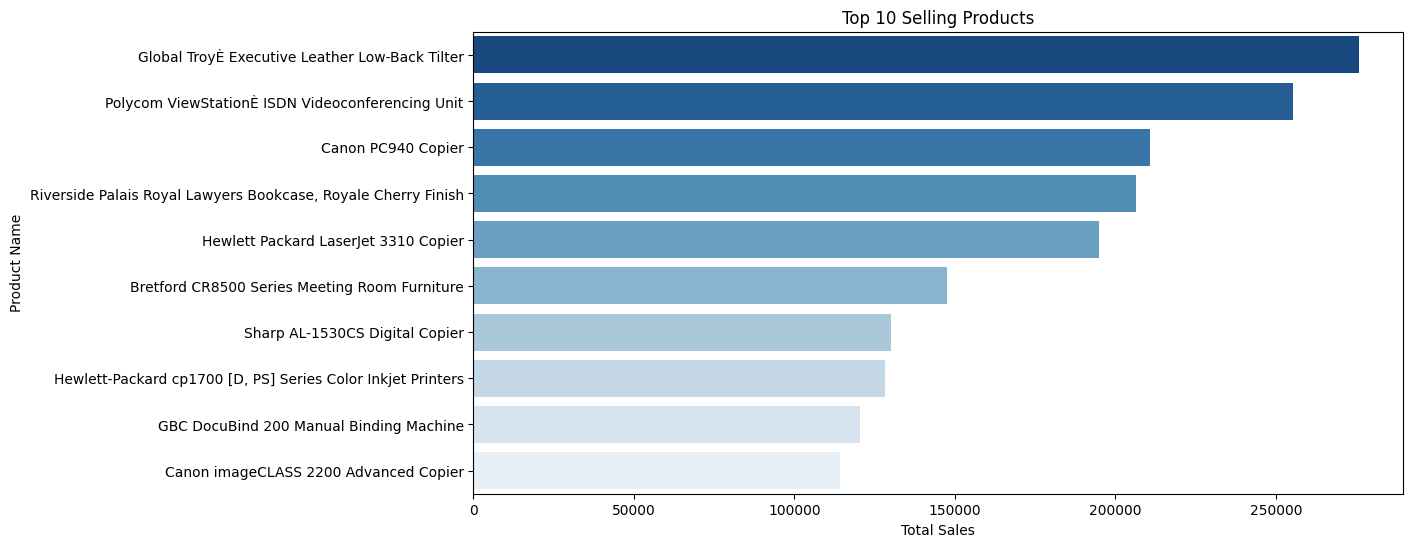

<Figure size 1400x600 with 0 Axes>

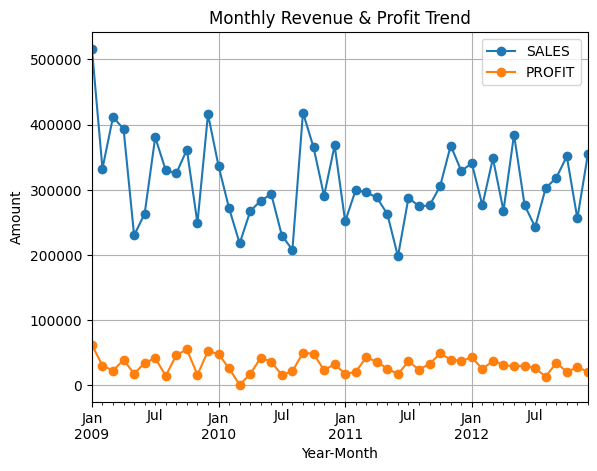

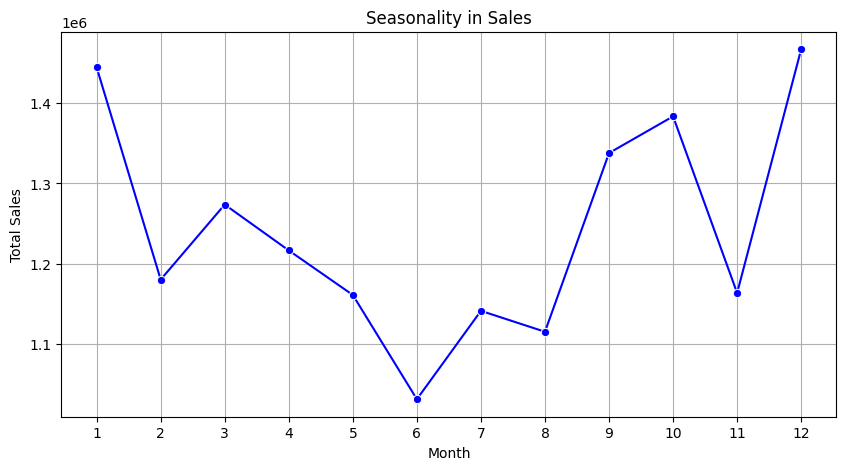

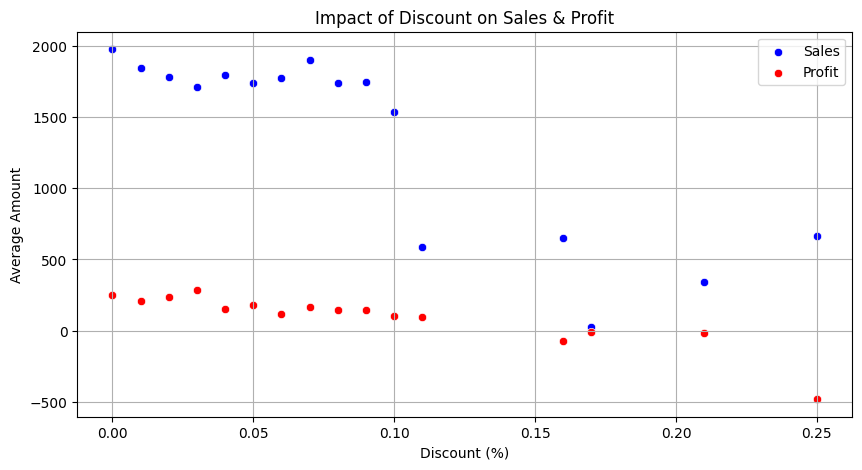

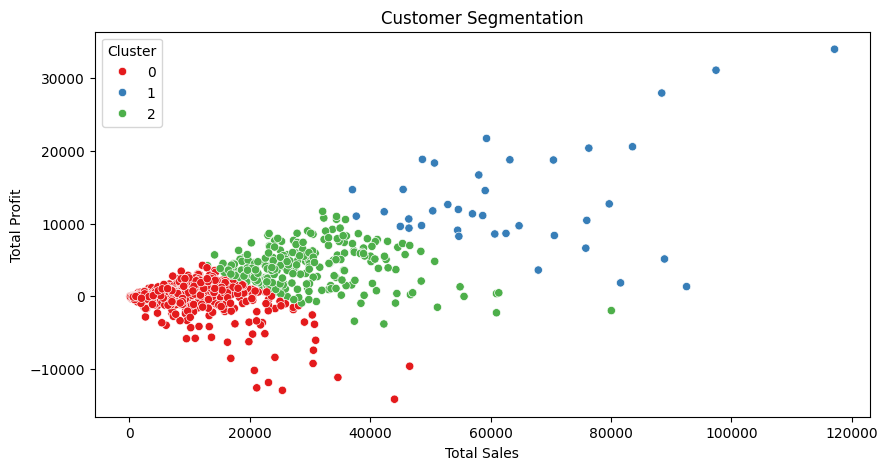

<Figure size 1000x500 with 0 Axes>

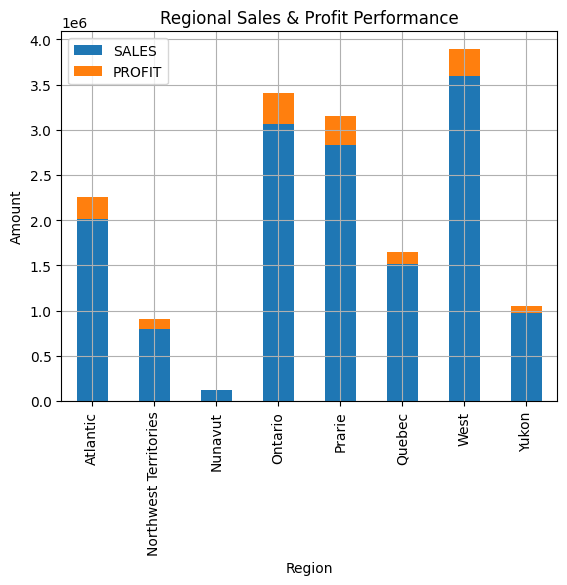

<Figure size 1000x500 with 0 Axes>

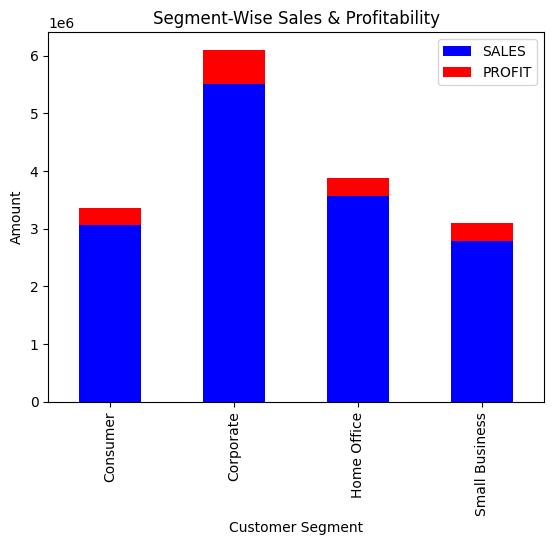

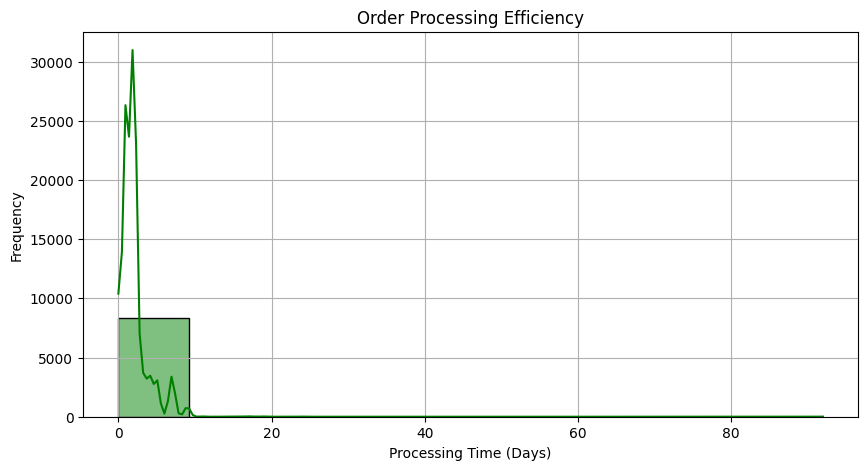

<ipython-input-3-5a9dcedfee98>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_mode.index, y=shipping_mode.values, palette='coolwarm')


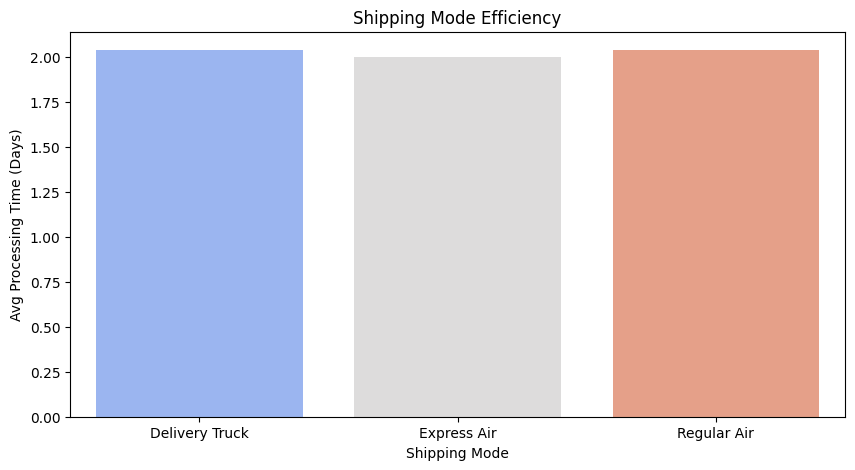

<ipython-input-3-5a9dcedfee98>:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=priority_impact.index, y=priority_impact.values, palette='viridis')


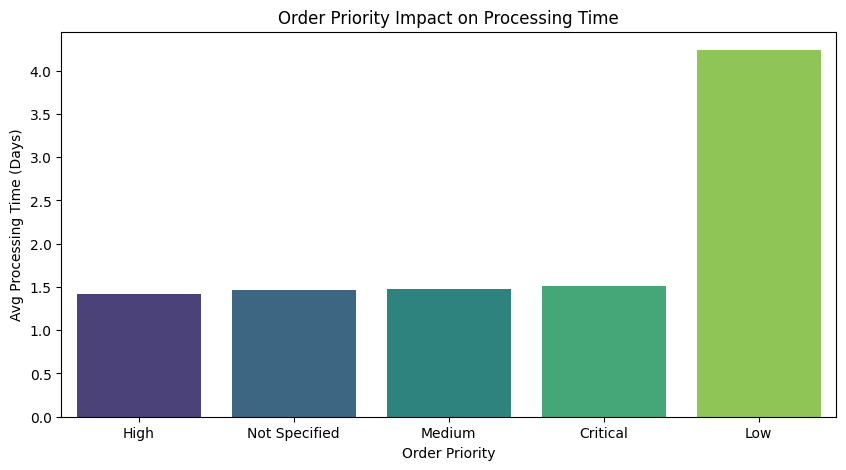

Analysis completed! Review visual outputs for managerial insights.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/ORDERS.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert date columns to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['SHIPDATE'] = pd.to_datetime(df['SHIPDATE'])

# Create a 'Year-Month' column for time-based analysis
df['Year-Month'] = df['ORDERDATE'].dt.to_period('M')

### 1. Top-Selling Products ###
top_products = df.groupby('PRODUCTNAME')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

### 2. Revenue & Profit Analysis ###
monthly_sales = df.groupby('Year-Month')[['SALES', 'PROFIT']].sum()
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Revenue & Profit Trend')
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.grid()
plt.show()

### 3. Seasonality in Sales ###
df['Month'] = df['ORDERDATE'].dt.month
seasonality = df.groupby('Month')['SALES'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=seasonality.index, y=seasonality.values, marker='o', color='blue')
plt.xticks(range(1, 13))
plt.title('Seasonality in Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

### 4. Discount Impact Analysis ###
discount_impact = df.groupby('DISCOUNT')[['SALES', 'PROFIT']].mean()
plt.figure(figsize=(10, 5))
sns.scatterplot(x=discount_impact.index, y=discount_impact['SALES'], label='Sales', color='blue')
sns.scatterplot(x=discount_impact.index, y=discount_impact['PROFIT'], label='Profit', color='red')
plt.title('Impact of Discount on Sales & Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Average Amount')
plt.legend()
plt.grid()
plt.show()

### 5. Customer Segmentation ###
customer_data = df.groupby('CUSTOMERNAME')[['SALES', 'PROFIT']].sum()
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_data)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_scaled)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=customer_data['SALES'], y=customer_data['PROFIT'], hue=customer_data['Cluster'], palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.show()

### 6. Regional Sales Performance ###
region_performance = df.groupby('REGION')[['SALES', 'PROFIT']].sum()
plt.figure(figsize=(10, 5))
region_performance[['SALES', 'PROFIT']].plot(kind='bar', stacked=True)
plt.title('Regional Sales & Profit Performance')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

### 7. Segment-Wise Sales & Profitability ###
segment_analysis = df.groupby('CUSTOMERSEGMENT')[['SALES', 'PROFIT']].sum()
plt.figure(figsize=(10, 5))
segment_analysis.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Segment-Wise Sales & Profitability')
plt.xlabel('Customer Segment')
plt.ylabel('Amount')
plt.legend()
plt.show()

### 8. Order Processing Efficiency ###
df['Processing Time'] = (df['SHIPDATE'] - df['ORDERDATE']).dt.days
plt.figure(figsize=(10, 5))
sns.histplot(df['Processing Time'], bins=10, kde=True, color='green')
plt.title('Order Processing Efficiency')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### 9. Shipping Mode Efficiency ###
shipping_mode = df.groupby('SHIPMODE')['Processing Time'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=shipping_mode.index, y=shipping_mode.values, palette='coolwarm')
plt.title('Shipping Mode Efficiency')
plt.xlabel('Shipping Mode')
plt.ylabel('Avg Processing Time (Days)')
plt.show()

### 10. Order Priority Impact ###
priority_impact = df.groupby('ORDERPRIOTORITY')['Processing Time'].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=priority_impact.index, y=priority_impact.values, palette='viridis')
plt.title('Order Priority Impact on Processing Time')
plt.xlabel('Order Priority')
plt.ylabel('Avg Processing Time (Days)')
plt.show()

print("Analysis completed! Review visual outputs for managerial insights.")
